In [ ]:
def add_noise(img, percentage):
    row , col = img.shape
     
    number_of_pixels = row * col
    perc = percentage / 100
    for i in range(round(round(number_of_pixels * perc) / 4) ):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 255
         
    for i in range(round(round(number_of_pixels * perc) / 4)):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img

def on_change(value):
    global noise
    print(value)
    noise = value
    salted = add_noise(img, value)
    cv2.imshow('salt-pepper noise', salted)
    cv2.waitKey(1)
    

img = cv2.imread('yachtGirl.jpg',
                 cv2.IMREAD_GRAYSCALE)
windowName = 'salt-pepper noise'
cv2.imshow(windowName, add_noise(img, 0))

cv2.createTrackbar('noise:', windowName, 0, 100, on_change)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

1


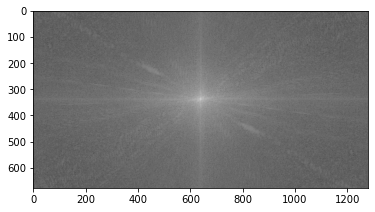

21


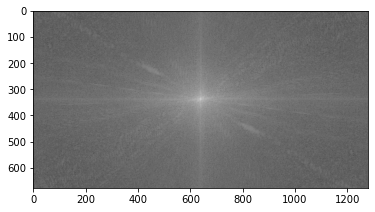

1


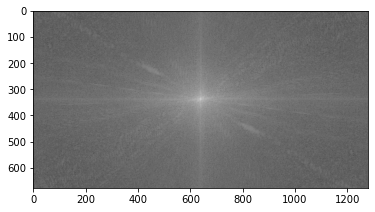

21


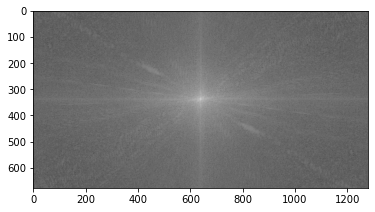

41


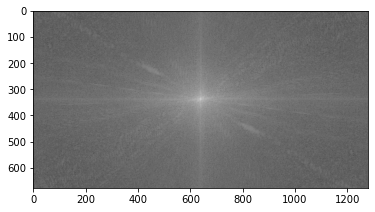

21


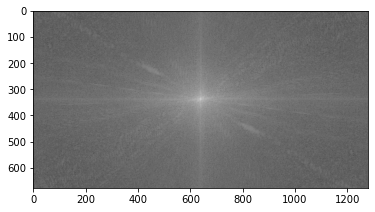

In [1]:
import cv2
import numpy as np
from random import random
import matplotlib.pyplot as plt


def add_salt_pepper_noise(img, probability):
    output = np.zeros(img.shape, np.uint8)
    h, w = img.shape[:2]
    for i in range(h):
        for j in range(w):
            rnd = random()
            prob = probability / 2.0
            inverse_prob = 1 - prob
            output[i, j] = 255 if rnd < prob else 0 if rnd > inverse_prob else img[i, j]
    return output


def median_blur(img, kernel_size):
    return cv2.medianBlur(img, kernel_size)


def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), sigmaX=0, sigmaY=0)


def bilateral_filter(img, kernel_size, sigma_color, sigma_space):
    return cv2.bilateralFilter(img, kernel_size, sigma_color, sigma_space)


# frequency filters
def mean_filter(img, kernel_size):
    return cv2.blur(img, (kernel_size, kernel_size))


def mag_spectrum(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    return 20 * np.log(np.abs(fshift))


noise = 0
img = cv2.imread('yachtGirl.jpg')
window_name = 'Noisy photo'


def on_slide(value):
    global noise
    print(value)
    noise = value
    salted = add_salt_pepper_noise(img, float(noise) / 100.0)
    cv2.imshow(window_name, salted)
    plt.imshow(mag_spectrum(cv2.imread('yachtGirl.jpg', 0)), cmap='gray')
    plt.show()
    cv2.waitKey(1)


while True:
    salted = add_salt_pepper_noise(img, float(noise) / 100.0)
    cv2.imshow(window_name, salted)
    cv2.createTrackbar('Noise gain', window_name, noise, 100, on_slide)
    k = cv2.waitKey(0)
    if k == 27:
        break
cv2.destroyAllWindows()

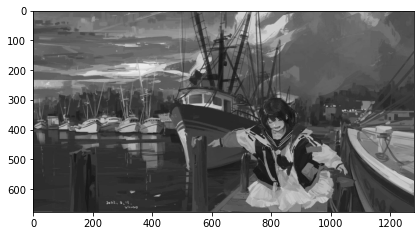

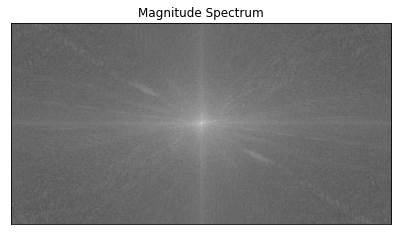

In [11]:
import cv2 as cv
import numpy as np
from random import random
import matplotlib.pyplot as plt

img = cv2.imread('yachtGirl.jpg',0)

dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(15,15)) 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.figure(figsize=(15,15)) 
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()



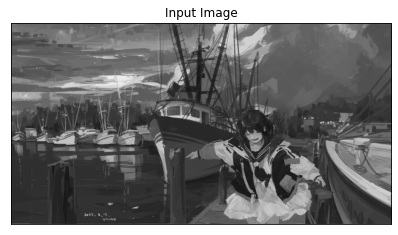

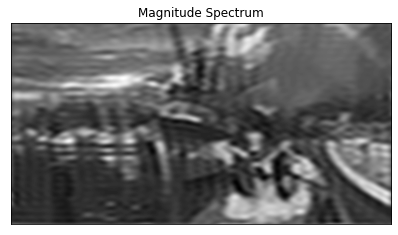

In [15]:
rows, cols = img.shape
crow,ccol = round(rows/2) , round(cols/2)
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15)) 
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

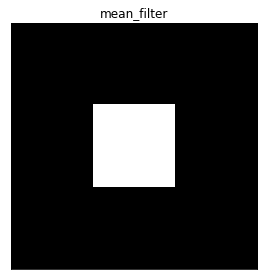

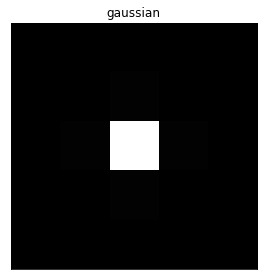

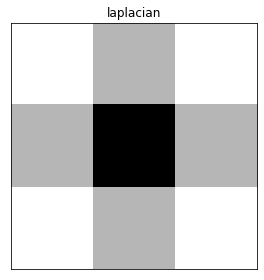

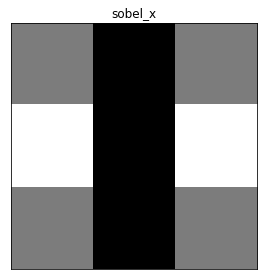

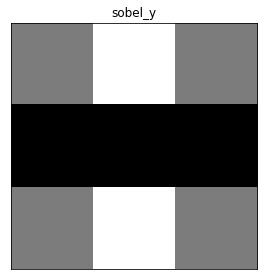

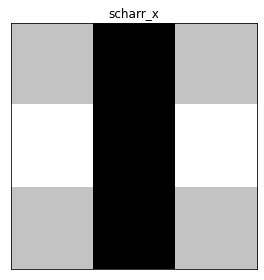

In [16]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))
# creating a gaussian filter
x = cv.getGaussianKernel(5,10)
gaussian = x*x.T
# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
for i in range(6):
    plt.figure(figsize=(15,15)) 
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()